In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import matplotlib.pyplot as plt
from Mapping import *
import numpy as np
from get_time_interval_data import *
from PIL import Image
from PCA import *
from Plot import *
import pickle

## MAPPING

Physical room coordinates

In [2]:
# desk points
# p0 = np.array([2.08, 1.81, 0.78])
# p1 = np.array([3.45, 1.81, 0.78])
# p2 = np.array([3.45, 2.57, 0.78])
# p3 = np.array([2.08, 2.57, 0.78])
# p4 = np.array([0.92, 1.71, 0.78])
# p5 = np.array([0.92, 3.54, 0.78])

In [3]:
# chair points
# p0 = np.array([0.450, 0.791, 0.5])
# p1 = np.array([2.598, 1.567, 0.5]) 
# p2 = np.array([3.544, 1.523, 0.5]) 
# p3 = np.array([3.040, 3.120, 0.5]) 
# p4 = np.array([1.266, 2.685, 0.5])

Generate linear transform B matrix

In [4]:
DOA_points_list = ['chair_points.p', 'desk_points.p', 'desk_chair_points.p']

room_coordinates_list = ['chair_points_room_coordinates.p', 
                         'desk_points_room_coordinates.p',
                         'desk_chair_points_room_coordinates.p']

In [5]:
pwd = '/home/ardelalegre/SoundMapping/Analysis/notebooks/data/'

In [6]:
DOA_points = pickle.load(open(pwd+'desk_chair_points.p','rb'))
room_coordinates = pickle.load(open(pwd+'desk_chair_points_room_coordinates.p','rb'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/ardelalegre/SoundMapping/Analysis/notebooks/data/desk_chair_points.p'

In [7]:
B,R_mean,D_mean,D = generate_linear_transform_matrix(DOA_points, room_coordinates, 3)

NameError: name 'DOA_points' is not defined

Linear transform

In [6]:
# find displacement of mean in room space
R_0 = R_mean-B @ D_mean
# affine transform all DOA points
r = R_0 + B @ D

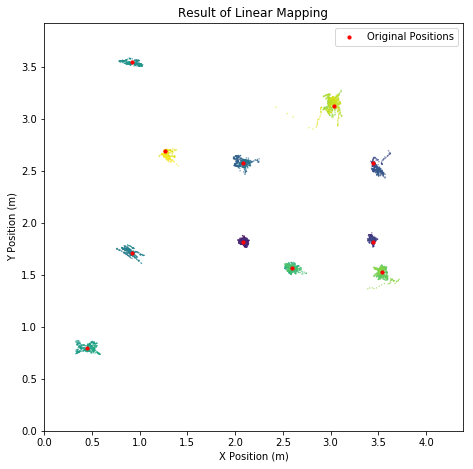

In [7]:
fig = plt.figure(figsize = [7.5,7.5])
ax = fig.add_subplot(111)
ax.scatter(r[0,:], r[1,:], c = np.arange(r.shape[1]), s = 0.1)
ax.set_title("Result of Linear Mapping")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_xlim(0,4.385)
ax.set_ylim(0,3.918)

ax.scatter(room_coordinates[:,0], 
           room_coordinates[:,1], 
           c = 'r', 
           s = 10, 
           label = 'Original Positions')
ax.legend();

# ax2 = fig.add_subplot(122)
# room_model_chair = plt.imread('../room_model_v4.png')
# ax2.imshow(room_model_chair)

1. Eigen vectors
2. B matrix (2 by 15 contour plots, in Matlab `imagesc()`)
3. In the production (loop) figure, include three subplots
    - PCA
    - Time series
    - Linear mapping

3D

In [58]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

In [78]:
# fig = plt.figure(figsize = [7.5,7.5])
# ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(r[0,:], r[1,:], r[2,:], c = np.arange(r.shape[1]), alpha=0.002)
# ax.set_xlim(0,4.385)
# ax.set_ylim(0,3.918)
# ax.set_zlim(0,2.574) # approximation
# ax.set_xlabel('X position (m)')
# ax.set_ylabel('Y position (m)')
# ax.set_zlabel('Z position (m)')
# ax.set_title('Mapping to 3D physical coordinates')

# ax.scatter(room_coordinates[:,0], 
#            room_coordinates[:,1], 
#            room_coordinates[:,2], 
#            c = 'r', 
#            s = 10, 
#            label = 'Original Positions')
# ax.legend();